In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install scikit-learn

In [3]:
import sklearn

In [4]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
train_data = pd.read_excel("~/anaconda3/DATA-SET/Flight_Price_resources/Data_Train.xlsx") #~

In [6]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
 train_data.info() # give me information about data type and number of non-null values(rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_data.isnull().sum() # shows missing value are in Rout and Total_Stops


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
train_data.dropna(inplace = True) # since it was only one row I removed it in place and updated my train_data

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [14]:
train_data.isnull().sum() # no missing value anymore

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
train_data.dtypes # objects in pandas is almost equal to string and int64 is 
#related to numpy package- it means 64bits integer

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [16]:
train_data.info(memory_usage= 'deep') # it will give me the actual memory usage based on the values of my data

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [17]:
data = train_data.copy()

In [18]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [19]:
# because I have some datatypes that are times like day/months/year and 
#because they are not usable in machine learning we need to change them to datetime type

In [20]:
def changeToDateTime(col):
    data[col] = pd.to_datetime(data[col])

In [21]:
for feature in ['Date_of_Journey','Dep_Time' , 'Arrival_Time']:
    changeToDateTime(feature)

In [22]:
data.info() #datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [23]:
data['Jorney_day'] = data['Date_of_Journey'].dt.day # dt.day - dt.month - dt.year  shows their values in pandas

In [24]:
data['Jorney_month'] = data['Date_of_Journey'].dt.month

In [25]:
data['Jorney_year'] = data['Date_of_Journey'].dt.year

In [26]:
data.head(3) # now we can see 3 cols added to my table

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Jorney_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-28 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-28 05:50:00,2024-05-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-28 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [27]:
def extract_hour_min(df,col): # extract hour and mins
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [28]:
extract_hour_min(data,'Dep_Time')
extract_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Jorney_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-28 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-28 05:50:00,2024-05-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-28 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [29]:
# now I don't need arrival_time and dep_time feature any more so i drop them

In [30]:
cols_toDrop = ['Arrival_Time','Dep_Time']
data.drop(cols_toDrop, axis=1, inplace= True)

In [31]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Jorney_day',
       'Jorney_month', 'Jorney_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [32]:
data.shape

(10682, 16)

can you analyse when will the most of the flights take-off?

In [33]:
def flightDepTime(x):
    if x>4 and x<=8:
        return 'Early Morning'
    
    elif x>8 and x<= 12:
        return 'Morning'
    
    elif x>12 and x<= 16:
        return 'Noon'
    
    elif x>16 and x<=20:
        return 'Evening'
    
    elif x>20 and x<= 24:
        return 'Night'
    
    else:
        return 'Late Night'

In [34]:
data['Dep_Time_hour'].apply(flightDepTime)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [35]:
data['Dep_Time_hour'].apply(flightDepTime).value_counts() # sum o f each time

Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

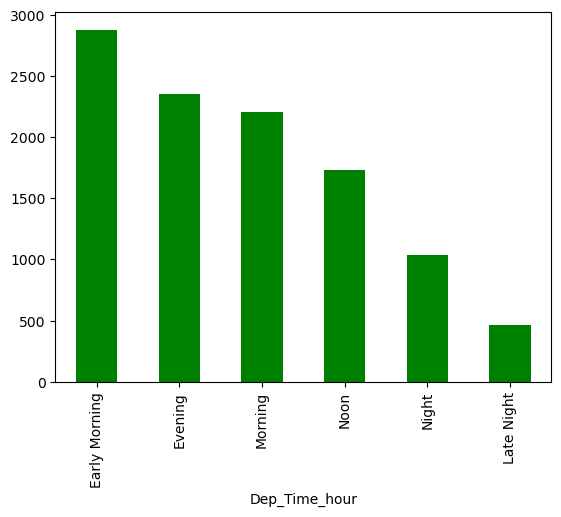

In [36]:
data['Dep_Time_hour'].apply(flightDepTime).value_counts().plot(kind="bar", color = "green")

# interactive plot using plotly

In [37]:
!pip install plotly
!pip install chart_studio

In [38]:
import plotly

In [39]:
!pip install cufflinks

In [40]:
import cufflinks as cf
from cufflinks.offline import go_offline
# plot= static chart, iplot = interactive plot  ,init_notebook_mode = for use in jupyter or colab

In [41]:
from plotly.offline import plot, iplot, init_notebook_mode , download_plotlyjs

In [42]:
init_notebook_mode(connected = True)
cf.go_offline()

In [43]:
data['Dep_Time_hour'].apply(flightDepTime).value_counts().iplot(kind="bar")

In [44]:
def preprocessTime(x):
    if 'h' not in x:
        x = '0h'+' '+x
    elif 'm'not in x:
        x = x + ' '+ '0m'
    return x

In [45]:

data['Duration'] = data['Duration'].apply(preprocessTime)

In [46]:
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [47]:
data['Duration_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [48]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Jorney_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


Does duration impact in flight?


In [49]:
# change the duration to total mins

In [50]:
data['Duration_total_mins']= data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [51]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Jorney_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


In [52]:
# using 'seaborn': for continues values like 1.2 , 1.5, 2 we use 'scatter plot' or 'regression' shows relationships and best line

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

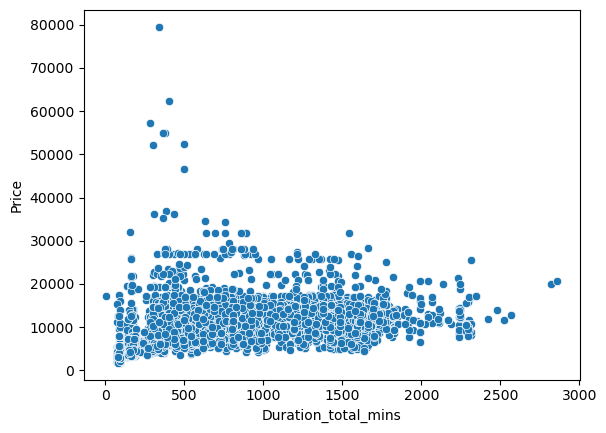

In [53]:
sns.scatterplot(x = 'Duration_total_mins', y = 'Price', data = data)

In [54]:
# hue parameter in seaborn works like instead of checking each number of stops seperately
#it shows them all together in one map

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

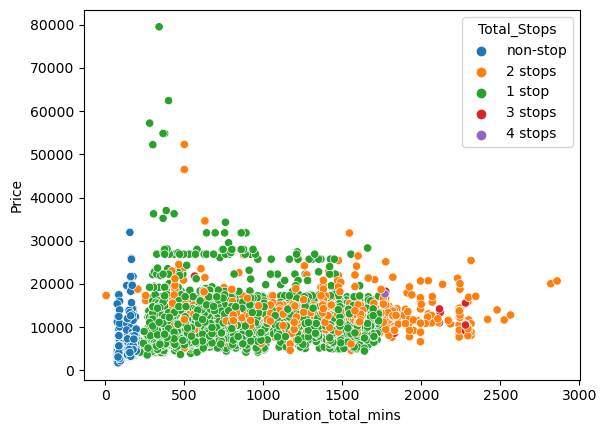

In [55]:
sns.scatterplot(x = 'Duration_total_mins',hue = 'Total_Stops', y = 'Price', data = data)

In [56]:
# non-stops = blue : less duration, low price 


In [57]:
# regression with mlplot -  the regression line shows when duration increases price also increases

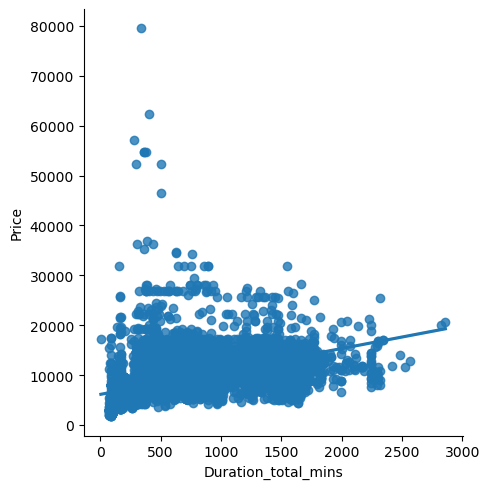

In [58]:
sns.lmplot(x = 'Duration_total_mins', y = 'Price', data = data)

which route JET AIRWAYS used the most?

In [59]:
data[data['Airline']=='Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jorney_day,Jorney_month,Jorney_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30,1530
13,Jet Airways,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,9,5,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-05-09,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,9,5,2019,11,40,19,0,7,20,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,15,0,900
10674,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,12,3,2019,20,35,21,20,24,45,1485


In [60]:
# number of flights of jet airways for each route in ascending order
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)


Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

airline vs price analytics


In [61]:
# when looking for min , average, max, median, percentile we use Boxplot

In [62]:
# (outlier)whisker<- |------(Q1)0.25xxx 0.50 xxx 0.75(Q3)------| -> whisker(outlier) -  the box holds 50 percentile (median)

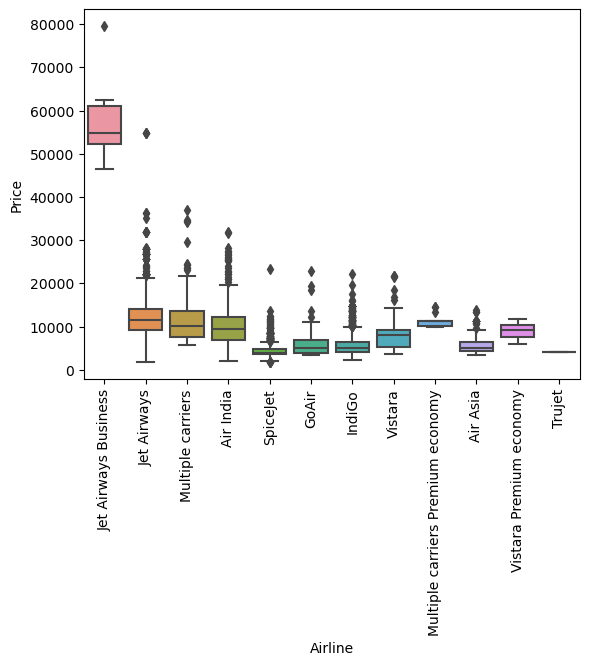

In [63]:
sns.boxplot(y="Price",x="Airline",data=data.sort_values('Price',ascending= False ))
plt.xticks(rotation="vertical") # to show x axis labels vertically
plt.show()

In [64]:
# changing string to numerical value for ML modeling : feature encoding

In [65]:
# nominal data: a data that doesn't have any order like a dehli, banglore,tehran--
#ordinal data: a data which has a order: like good, better,best ---> lable encoding

In [66]:
# if we have nominal data it's always good to use "one-hot" encoder-

In [67]:
#on-hot encoding is like put value 1 for my target data and 0 for other data

In [68]:
cat_col = [col for col in data.columns if data[col].dtype =='object']

In [69]:
num_col = [col for col in data.columns if data[col].dtype !='object']

In [70]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [71]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [72]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0) # one-hot encoding from scratch

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [73]:
for cat in data['Source'].unique(): # for all the list
    data['Source_'+ cat]= data['Source'].apply(lambda x:1 if x== cat else 0)

In [74]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jorney_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [75]:
data['Airline'].nunique() # if i do one-hot for each of them there would add a lot of columns to my table : curse of dimention

12

In [76]:
#target guided encoding --> airlines based on my target which is price

In [77]:
data.groupby('Airline')['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [78]:
airlines= data.groupby('Airline')['Price'].mean().sort_values().index

In [79]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [80]:
dict_airlines = {value:key for key, value in enumerate(airlines,0)}

In [81]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [82]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [83]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [84]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jorney_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [85]:
data['Destination']

0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10678     Banglore
10679     Banglore
10680        Delhi
10681    New Delhi
10682       Cochin
Name: Destination, Length: 10682, dtype: object

In [86]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [87]:
data['Destination'].replace('New Delhi','Delhi', inplace=True)

In [88]:
destination = data.groupby('Destination')['Price'].mean().sort_values().index

In [89]:
destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [90]:
destination_dict = {value: key for key, value in enumerate(destination,0)}

In [91]:
destination_dict

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [92]:
data['Destination'] =data['Destination'].map(destination_dict)

In [93]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jorney_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


perform outlier detection

In [94]:
def plot(df, col):
    
    fig,(ax1,ax2,ax3)= plt.subplots(3,1) # 3 plots on 1 column
    
    sns.distplot(df[col],ax=ax1)
    
    sns.boxplot(df[col],ax=ax2, orient='h')  # Horizontal boxplot)
    
    sns.distplot(df[col],ax=ax3, kde =False)

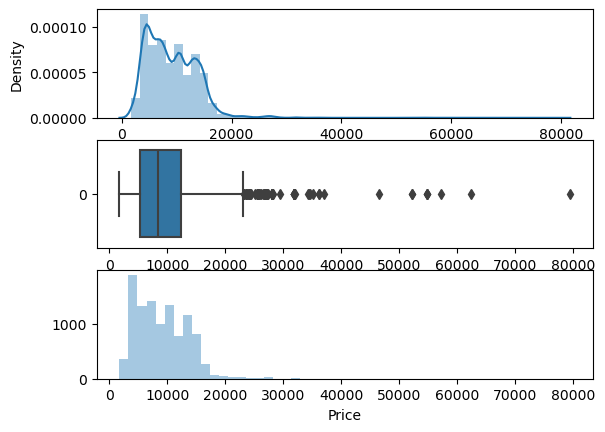

In [95]:
plot(data,'Price')

In [96]:
# when we have skewness in a side( here: right side) we use IQR (Inter Quantile Range).

In [97]:
# good approach : we replace outliers with median value

In [98]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1 
maximum = q3 + (1.5 * iqr)
minimum = q1 - (1.5 * iqr)

In [99]:
print(maximum)

23017.0


In [100]:
print(minimum)

-5367.0


In [101]:
print([price for price in data['Price'] if price < minimum or price > maximum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [102]:
len([price for price in data['Price'] if price < minimum or price > maximum]) # number of outliers

94

In [103]:
# use numpy 'where()'# the domain expertie tell me 35000 is my thresholds value

In [104]:
data['Price'] = np.where(data['Price'] >= 35000, data['Price'].median(), data['Price'])

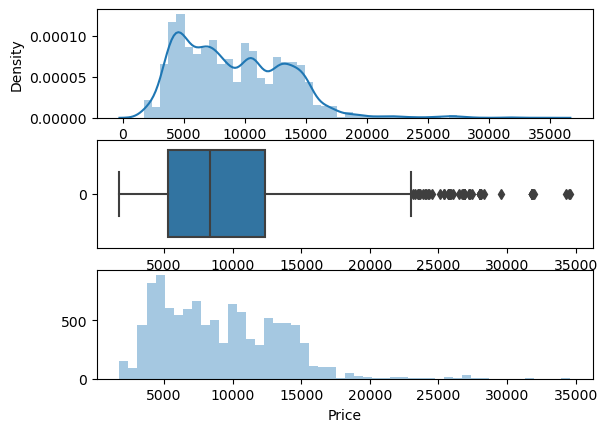

In [105]:
plot(data,'Price')

In [106]:
data_todrop = ['Date_of_Journey','Source','Route','Duration','Additional_Info']
data.drop(data_todrop,axis=1,inplace = True)



In [107]:
print(data['Total_Stops'].unique())

['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']


In [108]:
# Define the mapping
mapping = {
    'none-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
} 

# Apply the mapping
data['Total_Stops'] = data['Total_Stops'].map(mapping)
data = data.dropna(subset = ['Total_Stops'])

In [109]:
#performing feature selection

In [110]:
data['Total_Stops']

1        2.0
2        2.0
3        1.0
4        1.0
6        1.0
        ... 
10672    2.0
10673    2.0
10674    1.0
10676    1.0
10682    2.0
Name: Total_Stops, Length: 7191, dtype: float64

In [111]:
# independent data/feature(airlines,route,destination,...) and dependent feature/target(price)

In [112]:
# we use mutual information approach : whether two random variable are related to each other or not

In [113]:
# if the measure of mutual information of two variable is zero means these two variables are completely independent

In [114]:
# close to 1 higher dependency

In [115]:
y = data['Price'] # targert

In [116]:
X = data.drop(['Price'], axis=1)

In [117]:
from sklearn.feature_selection import mutual_info_regression

In [118]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Jorney_day,Jorney_month,Jorney_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
1,7,3,2.0,7662.0,1,5,2019,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2.0,13882.0,9,6,2019,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,1.0,6218.0,12,5,2019,18,5,23,30,5,25,325,0,1,0,0,0


In [119]:
imp = mutual_info_regression(X,y)

In [120]:
imp

array([1.08395944, 0.635521  , 0.36806482, 0.5229384 , 0.67186877,
       0.        , 0.79444382, 0.68491489, 0.9946717 , 0.82021642,
       0.60827631, 0.40585444, 1.19110818, 0.17363934, 0.47064016,
       0.47359428, 0.        , 0.02198025])

In [121]:
imp_df = pd.DataFrame(imp,index= X.columns)

In [122]:
imp_df.columns=['Importance']

In [123]:
imp_df.sort_values(by='Importance',ascending=False)

,Importance
Duration_total_mins,1.191108
Airline,1.083959
Arrival_Time_hour,0.994672
Arrival_Time_minute,0.820216
Dep_Time_hour,0.794444
Dep_Time_minute,0.684915
Jorney_month,0.671869
Destination,0.635521
Duration_hours,0.608276
Jorney_day,0.522938
